In [20]:
import turicreate
titanic_data = turicreate.SFrame('TitanicData')
#titanic_data = turicreate.SFrame('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [54]:
features = [x for x in titanic_data.column_names() if x != 'Survived' and x != 'Name']
features

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Categorized_Age',
 'Title']

In [64]:
reduced_features = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

In [65]:
titanic_decision_tree_model = turicreate.decision_tree_classifier.create(titanic_data, features=features, target='Survived')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Decision tree classifier:

--------------------------------------------------------

Number of examples          : 846

Number of classes           : 2

Number of feature columns   : 12

Number of unpacked features : 12

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011742     | 0.881797          | 0.866667            | 0.359420          | 0.348869            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [66]:
titanic_decision_tree_model.evaluate(titanic_data)['auc']

0.9112660978493593

In [67]:
titanic_decision_tree_model.predict(titanic_data[0:10])

dtype: int
Rows: 10
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1]

In [68]:
titanic_data['Survived'][:10]

dtype: int
Rows: 10
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

In [69]:
titanic_decision_tree_model

Class                          : DecisionTreeClassifier

Schema
------
Number of examples             : 846
Number of feature columns      : 12
Number of unpacked features    : 12
Number of classes              : 2

Settings
--------
Number of trees                : 1
Max tree depth                 : 6
Training time (sec)            : 0.0121
Training accuracy              : 0.8818
Validation accuracy            : 0.8667
Training log_loss              : 0.3594
Validation log_loss            : 0.3489
Training auc                   : 0.9108
Validation auc                 : 0.9259

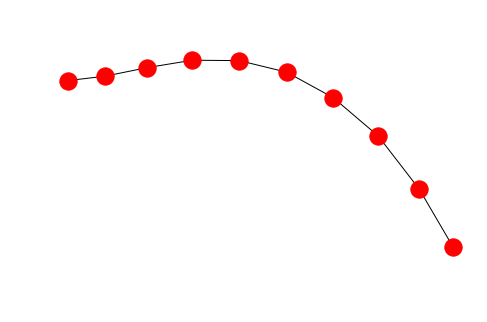

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
from turicreate import SGraph, Vertex, Edge

# construct an SGraph (skip this if you already have one)
sg = SGraph()
sg = sg.add_vertices([Vertex(i) for i in range(10)])
sg = sg.add_edges([Edge(i, i+1) for i in range(9)])

# convert to NetworkX graph
g = nx.Graph()
g.add_nodes_from(sg.vertices['__id'])
g.add_edges_from(sg.edges.apply(lambda row: [v for (k,v) in row.items()]))

# Draw it and show on screen
nx.draw(g)
plt.show()

In [71]:
info = titanic_decision_tree_model.trees_json

In [97]:
print tree['vertices'][0]
print tree['edges'][0]

{'name': 'Sex=male', 'value_hexadecimal': '000028B7', 'yes_child': 2, 'cover': 211.5, 'missing_child': 1, 'no_child': 1, 'type': 'indicator', 'id': 0, 'value': 1, 'gain': 232.40239}
{'src': 0, 'dst': 2, 'value': 'yes'}


In [86]:
tree = {"vertices":[{"id":0,"name":"Sex=male","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":232.40239,"cover":211.5,"missing_child":1,"yes_child":2,"no_child":1},{"id":1,"name":"Pclass","type":"integer","value":2.5,"value_hexadecimal":"00002040","gain":56.444885,"cover":74.75,"missing_child":3,"yes_child":3,"no_child":4},{"id":3,"name":"Cabin=C22 C26","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":5.721062,"cover":40.25,"missing_child":7,"yes_child":8,"no_child":7},{"id":7,"name":"Ticket=11668","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":2.792515,"cover":39.75,"missing_child":15,"yes_child":16,"no_child":15},{"id":15,"name":"Ticket=PC 17595","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":2.837145,"cover":39.5,"missing_child":27,"yes_child":28,"no_child":27},{"id":27,"name":"Ticket=248747","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":2.882608,"cover":39.25,"missing_child":45,"yes_child":46,"no_child":45},{"id":45,"type":"leaf","value":1.85,"value_hexadecimal":"CDCCEC3F","gain":0,"cover":39},{"id":46,"type":"leaf","value":-0.4,"value_hexadecimal":"CDCCCCBE","gain":0,"cover":0.25},{"id":28,"type":"leaf","value":-0.4,"value_hexadecimal":"CDCCCCBE","gain":0,"cover":0.25},{"id":16,"type":"leaf","value":-0.4,"value_hexadecimal":"CDCCCCBE","gain":0,"cover":0.25},{"id":8,"type":"leaf","value":-0.666667,"value_hexadecimal":"ABAA2ABF","gain":0,"cover":0.5},{"id":4,"name":"Fare","type":"float","value":23.35,"value_hexadecimal":"CDCCBA41","gain":16.781609,"cover":34.5,"missing_child":9,"yes_child":9,"no_child":10},{"id":9,"name":"Age","type":"float","value":19.5,"value_hexadecimal":"00009C41","gain":4.685058,"cover":28,"missing_child":17,"yes_child":17,"no_child":18},{"id":17,"name":"Ticket=349909","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":2.531034,"cover":14,"missing_child":29,"yes_child":30,"no_child":29},{"id":29,"name":"Ticket=2665","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":2.807061,"cover":13.5,"missing_child":47,"yes_child":48,"no_child":47},{"id":47,"type":"leaf","value":0.928571,"value_hexadecimal":"DBB66D3F","gain":0,"cover":13},{"id":48,"type":"leaf","value":-0.666667,"value_hexadecimal":"ABAA2ABF","gain":0,"cover":0.5},{"id":30,"type":"leaf","value":-0.666667,"value_hexadecimal":"ABAA2ABF","gain":0,"cover":0.5},{"id":18,"name":"Fare","type":"float","value":15.675,"value_hexadecimal":"CDCC7A41","gain":3.324638,"cover":14,"missing_child":31,"yes_child":31,"no_child":32},{"id":31,"name":"Fare","type":"float","value":7.7,"value_hexadecimal":"6666F640","gain":4.037267,"cover":10.5,"missing_child":49,"yes_child":49,"no_child":50},{"id":49,"type":"leaf","value":1,"value_hexadecimal":"0000803F","gain":0,"cover":1},{"id":50,"type":"leaf","value":-0.571429,"value_hexadecimal":"254912BF","gain":0,"cover":9.5},{"id":32,"name":"PassengerId","type":"integer","value":564,"value_hexadecimal":"00000D44","gain":1.409524,"cover":3.5,"missing_child":51,"yes_child":51,"no_child":52},{"id":51,"type":"leaf","value":0.933333,"value_hexadecimal":"EFEE6E3F","gain":0,"cover":2.75},{"id":52,"type":"leaf","value":-0.285714,"value_hexadecimal":"254992BE","gain":0,"cover":0.75},{"id":10,"name":"Ticket=347077","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":4.619048,"cover":6.5,"missing_child":19,"yes_child":20,"no_child":19},{"id":19,"name":"Parch","type":"integer","value":0.5,"value_hexadecimal":"0000003F","gain":2.506877,"cover":6,"missing_child":33,"yes_child":33,"no_child":34},{"id":33,"type":"leaf","value":0.4,"value_hexadecimal":"CDCCCC3E","gain":0,"cover":0.25},{"id":34,"type":"leaf","value":-1.703704,"value_hexadecimal":"F712DABF","gain":0,"cover":5.75},{"id":20,"type":"leaf","value":0.666667,"value_hexadecimal":"ABAA2A3F","gain":0,"cover":0.5},{"id":2,"name":"Cabin=","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":25.986063,"cover":136.75,"missing_child":5,"yes_child":6,"no_child":5},{"id":5,"name":"Age","type":"float","value":18,"value_hexadecimal":"00009041","gain":7.513611,"cover":25.75,"missing_child":11,"yes_child":11,"no_child":12},{"id":11,"type":"leaf","value":1.272727,"value_hexadecimal":"BAE8A23F","gain":0,"cover":1.75},{"id":12,"name":"PassengerId","type":"integer","value":361.5,"value_hexadecimal":"00C0B443","gain":4.49,"cover":24,"missing_child":21,"yes_child":21,"no_child":22},{"id":21,"name":"Age","type":"float","value":42,"value_hexadecimal":"00002842","gain":2.273504,"cover":9,"missing_child":35,"yes_child":35,"no_child":36},{"id":35,"name":"PassengerId","type":"integer","value":100.5,"value_hexadecimal":"0000C942","gain":2.215384,"cover":5.5,"missing_child":53,"yes_child":53,"no_child":54},{"id":53,"type":"leaf","value":0.4,"value_hexadecimal":"CDCCCC3E","gain":0,"cover":1.5},{"id":54,"type":"leaf","value":-0.8,"value_hexadecimal":"CDCC4CBF","gain":0,"cover":4},{"id":36,"type":"leaf","value":-1.555556,"value_hexadecimal":"721CC7BF","gain":0,"cover":3.5},{"id":22,"name":"Fare","type":"float","value":7.9,"value_hexadecimal":"CDCCFC40","gain":3.418966,"cover":15,"missing_child":37,"yes_child":37,"no_child":38},{"id":37,"type":"leaf","value":-1.2,"value_hexadecimal":"9A9999BF","gain":0,"cover":1.5},{"id":38,"name":"Age","type":"float","value":57,"value_hexadecimal":"00006442","gain":3.164546,"cover":13.5,"missing_child":55,"yes_child":55,"no_child":56},{"id":55,"type":"leaf","value":0.27451,"value_hexadecimal":"8D8C8C3E","gain":0,"cover":11.75},{"id":56,"type":"leaf","value":-0.909091,"value_hexadecimal":"2FBA68BF","gain":0,"cover":1.75},{"id":6,"name":"Title=Master.","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":13.036436,"cover":111,"missing_child":13,"yes_child":14,"no_child":13},{"id":13,"name":"Ticket=1601","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":9.756483,"cover":103.25,"missing_child":23,"yes_child":24,"no_child":23},{"id":23,"name":"Ticket=244373","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":2.412802,"cover":101.5,"missing_child":39,"yes_child":40,"no_child":39},{"id":39,"name":"Ticket=2677","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":2.428561,"cover":101.25,"missing_child":57,"yes_child":58,"no_child":57},{"id":57,"type":"leaf","value":-1.598039,"value_hexadecimal":"8D8CCCBF","gain":0,"cover":101},{"id":58,"type":"leaf","value":0.4,"value_hexadecimal":"CDCCCC3E","gain":0,"cover":0.25},{"id":40,"type":"leaf","value":0.4,"value_hexadecimal":"CDCCCC3E","gain":0,"cover":0.25},{"id":24,"name":"PassengerId","type":"integer","value":760,"value_hexadecimal":"00003E44","gain":0.181818,"cover":1.75,"missing_child":41,"yes_child":41,"no_child":42},{"id":41,"name":"PassengerId","type":"integer","value":340,"value_hexadecimal":"0000AA43","gain":0.285714,"cover":1.25,"missing_child":59,"yes_child":59,"no_child":60},{"id":59,"type":"leaf","value":0,"value_hexadecimal":"00000080","gain":0,"cover":0.5},{"id":60,"type":"leaf","value":0.857143,"value_hexadecimal":"B76D5B3F","gain":0,"cover":0.75},{"id":42,"name":"PassengerId","type":"integer","value":833,"value_hexadecimal":"00405044","gain":0.4,"cover":0.5,"missing_child":61,"yes_child":61,"no_child":62},{"id":61,"type":"leaf","value":-0.4,"value_hexadecimal":"CDCCCCBE","gain":0,"cover":0.25},{"id":62,"type":"leaf","value":0.4,"value_hexadecimal":"CDCCCC3E","gain":0,"cover":0.25},{"id":14,"name":"SibSp","type":"integer","value":2,"value_hexadecimal":"00000040","gain":21.320396,"cover":7.75,"missing_child":25,"yes_child":25,"no_child":26},{"id":25,"type":"leaf","value":1.529412,"value_hexadecimal":"C4C3C33F","gain":0,"cover":3.25},{"id":26,"name":"Ticket=347077","type":"indicator","value":1,"value_hexadecimal":"000028B7","gain":1.163636,"cover":4.5,"missing_child":43,"yes_child":44,"no_child":43},{"id":43,"type":"leaf","value":-1.6,"value_hexadecimal":"CDCCCCBF","gain":0,"cover":4},{"id":44,"name":"PassengerId","type":"integer","value":222.5,"value_hexadecimal":"00805E43","gain":0.4,"cover":0.5,"missing_child":63,"yes_child":63,"no_child":64},{"id":63,"type":"leaf","value":-0.4,"value_hexadecimal":"CDCCCCBE","gain":0,"cover":0.25},{"id":64,"type":"leaf","value":0.4,"value_hexadecimal":"CDCCCC3E","gain":0,"cover":0.25}],"edges":[{"src":0,"dst":2,"value":"yes"},{"src":0,"dst":1,"value":"no"},{"src":1,"dst":3,"value":"yes"},{"src":1,"dst":4,"value":"no"},{"src":3,"dst":8,"value":"yes"},{"src":3,"dst":7,"value":"no"},{"src":7,"dst":16,"value":"yes"},{"src":7,"dst":15,"value":"no"},{"src":15,"dst":28,"value":"yes"},{"src":15,"dst":27,"value":"no"},{"src":27,"dst":46,"value":"yes"},{"src":27,"dst":45,"value":"no"},{"src":4,"dst":9,"value":"yes"},{"src":4,"dst":10,"value":"no"},{"src":9,"dst":17,"value":"yes"},{"src":9,"dst":18,"value":"no"},{"src":17,"dst":30,"value":"yes"},{"src":17,"dst":29,"value":"no"},{"src":29,"dst":48,"value":"yes"},{"src":29,"dst":47,"value":"no"},{"src":18,"dst":31,"value":"yes"},{"src":18,"dst":32,"value":"no"},{"src":31,"dst":49,"value":"yes"},{"src":31,"dst":50,"value":"no"},{"src":32,"dst":51,"value":"yes"},{"src":32,"dst":52,"value":"no"},{"src":10,"dst":20,"value":"yes"},{"src":10,"dst":19,"value":"no"},{"src":19,"dst":33,"value":"yes"},{"src":19,"dst":34,"value":"no"},{"src":2,"dst":6,"value":"yes"},{"src":2,"dst":5,"value":"no"},{"src":5,"dst":11,"value":"yes"},{"src":5,"dst":12,"value":"no"},{"src":12,"dst":21,"value":"yes"},{"src":12,"dst":22,"value":"no"},{"src":21,"dst":35,"value":"yes"},{"src":21,"dst":36,"value":"no"},{"src":35,"dst":53,"value":"yes"},{"src":35,"dst":54,"value":"no"},{"src":22,"dst":37,"value":"yes"},{"src":22,"dst":38,"value":"no"},{"src":38,"dst":55,"value":"yes"},{"src":38,"dst":56,"value":"no"},{"src":6,"dst":14,"value":"yes"},{"src":6,"dst":13,"value":"no"},{"src":13,"dst":24,"value":"yes"},{"src":13,"dst":23,"value":"no"},{"src":23,"dst":40,"value":"yes"},{"src":23,"dst":39,"value":"no"},{"src":39,"dst":58,"value":"yes"},{"src":39,"dst":57,"value":"no"},{"src":24,"dst":41,"value":"yes"},{"src":24,"dst":42,"value":"no"},{"src":41,"dst":59,"value":"yes"},{"src":41,"dst":60,"value":"no"},{"src":42,"dst":61,"value":"yes"},{"src":42,"dst":62,"value":"no"},{"src":14,"dst":25,"value":"yes"},{"src":14,"dst":26,"value":"no"},{"src":26,"dst":44,"value":"yes"},{"src":26,"dst":43,"value":"no"},{"src":44,"dst":63,"value":"yes"},{"src":44,"dst":64,"value":"no"}]}

In [110]:
vertices = []
for i in tree['vertices']:
    vertices.append(Vertex(i['id'], attr={'label': i['name']}))

KeyError: 'name'

In [111]:
edges = []
for i in tree['edges']:
    edges.append(Edge(i['src'], i['dst']))

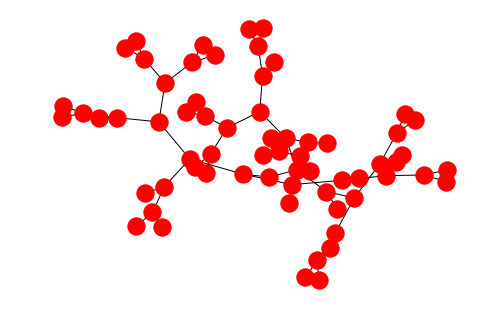

In [112]:
# construct an SGraph (skip this if you already have one)
sg = SGraph()
sg = sg.add_vertices(vertices)
sg = sg.add_edges(edges)

# convert to NetworkX graph
g = nx.Graph()
g.add_nodes_from(sg.vertices['__id'])
g.add_edges_from(sg.edges.apply(lambda row: [v for (k,v) in row.items()]))

# Draw it and show on screen
nx.draw(g)
plt.show()